In this notebook we're going to dive into what our actual image data looks like, and resize all our images to make them easier to work with!

In [1]:
# Here are some packages we'll be using in the notebook
import pandas as pd # Our old friend pandas for importing our tabular data
import cv2 # cv2 to manipulating images
import os # os for navigating our filesystem


In [2]:
train_df = pd.read_csv('/kaggle/input/how-much-would-you-pay-for-a-fake-cat/train.csv')
train_df.head()

,id,price,speed,image
0,7d46fd31038904e2,2.13,Fast (1m),./images/7d46fd31038904e2.png
1,76690b9129b9895c,0.46,Catatonic (1w),./images/76690b9129b9895c.png
2,c5f9966acce22205,10,Swift (2m),./images/c5f9966acce22205.png
3,dfcbc3748fa8e4ba,2,Catatonic (1w),./images/dfcbc3748fa8e4ba.png
4,eefb9c589f2ad43a,1,Snappy (10m),./images/eefb9c589f2ad43a.png


In [3]:
# All our images are in this directory:
image_directory = '/kaggle/input/how-much-would-you-pay-for-a-fake-cat/images/images'
os.listdir(image_directory)[:10]

['bd76ce405ca030f0.png',
 '34d98197dd981857.png',
 '1e791e3dca205293.png',
 '1535ef6163d105a7.png',
 '554e8dd43445315d.png',
 '42b58bf5b2e6aaf3.png',
 '7cad8c00d738dfbf.png',
 '950fe8340b0d1757.png',
 'b9013067727c5309.png',
 'ccff7d1269248155.png']

In [4]:
# If we open one of our image files, we can see the data inside it
file_path = os.path.join(image_directory, 'bd76ce405ca030f0.png')
im = cv2.imread(file_path, cv2.COLOR_BGRA2RGB)
im

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

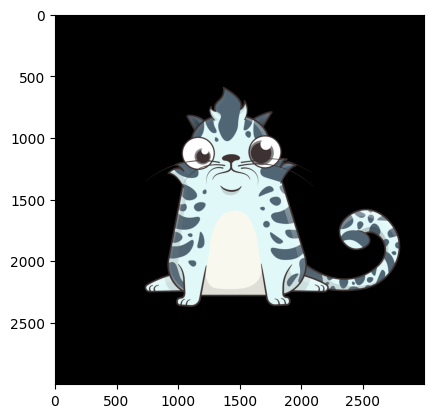

In [5]:
# Our image is a 3 DIMENSIONAL array
# The first 2 dimensions are simple: the x and y axes of our image
# The 3rd dimension is the color dimension: this holds information about how much red, blue, green and transparency that pixel has
# We can use matplot lib to show that image data in the way we expect

import matplotlib.pyplot as plt

plt.imshow(im)

In [6]:
# The image is literally just a numpy array, so we can see the exact dimensions by looking at the .shape property
im.shape

(3000, 3000, 3)

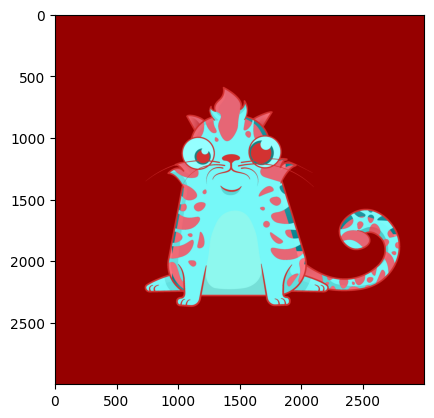

In [7]:
# For the sake of demonstrating that there's nothing "special" about this array, let's play around with it:
red_copy = im.copy()
red_copy[:,:,0] += 150

# Now everything is more red!
plt.imshow(red_copy)

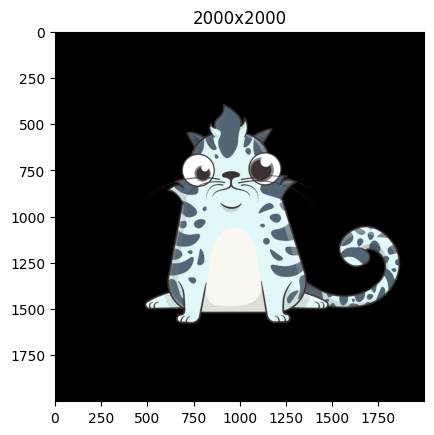

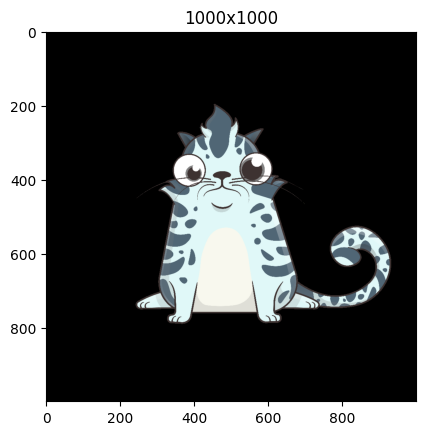

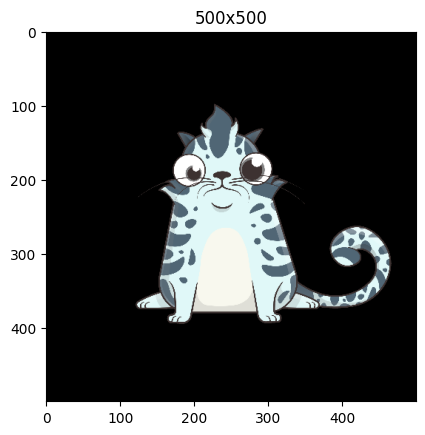

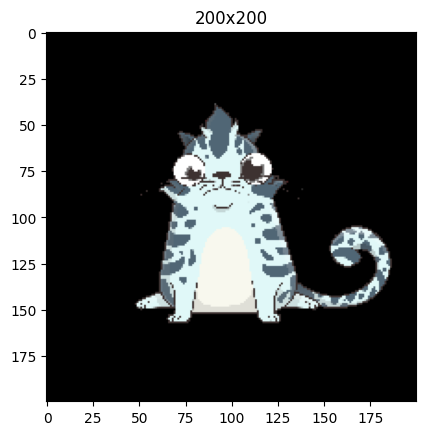

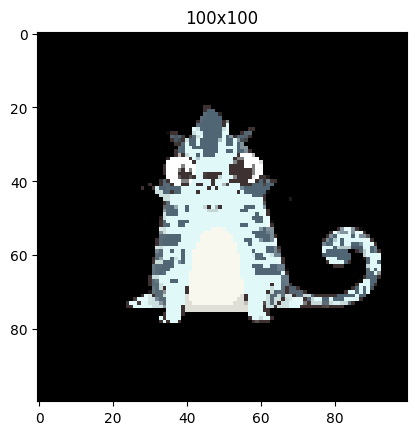

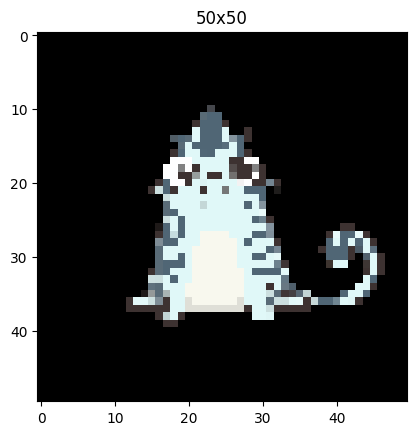

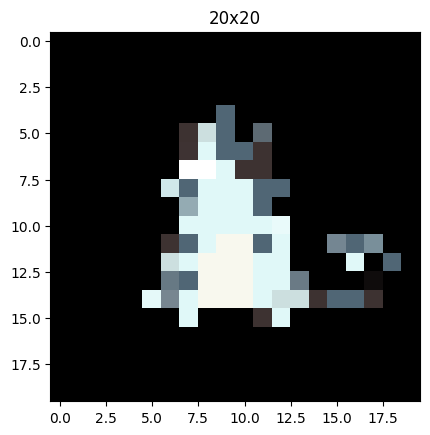

In [8]:
# 3000x3000 is probably bigger than we need, and it might blow up our kaggle environment if we try to store all 2k of the photos
# Let's try resizing, and looking at the resulting image to see how much detail we lose:
for h in [2000, 1000, 500, 200, 100, 50, 20]:
    resized_im = cv2.resize(im, (h, h,))
    plt.title(f'{h}x{h}')
    plt.imshow(resized_im)
    plt.show()

In [9]:
# 200x200 seems to keep a lot of the important detail, but will make our resulting images less than 1% the size of the originals!
# This is something you can play with, but lets resize everything to 200x200--this will speed up future work

In [10]:
import os
import tqdm
resized_directory = '/kaggle/working/resized'
os.mkdir(resized_directory)
images = []
for filename in tqdm.tqdm(os.listdir(image_directory)):
    im = cv2.imread(os.path.join(image_directory, filename), cv2.COLOR_BGRA2RGB)
    im = cv2.resize(im, (200, 200))
    write_path = os.path.join(resized_directory, filename)
    cv2.imwrite(write_path, im)

100%|██████████| 2120/2120 [04:58<00:00,  7.09it/s]
